# CLUSTERING THE MILITARY POWERS OF COUNTRIES

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_excel("../Data/World military power.xlsx", skiprows=1)

In [3]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [4]:
# Ülke isimlerinin tekrarı olan alanlardan kurtulalım
df1 = df.iloc[:, 0:2] # İlk 2 sütunu alalım
df2 = df.filter(like='value') # Sütun adında value olanları alalım
df=pd.concat([df1, df2], axis=1) # Bu ikisini birleştirelim

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [6]:
df["defense spending budget value"]= df["defense spending budget value"].str.replace(",","").astype(float)
df["External Debt value"]= df["External Debt value"].str.replace(",","").astype(float)
df["Oil Production value"]= df["Oil Production value"].str.replace(",","").astype(float)
df["Proven Oil Reserves value"]= df["Proven Oil Reserves value"].str.replace(",","").astype(float)
df["Total Population value"]= df["Total Population value"].str.replace(",","").astype(float)
df["Total Coastline Coverage value"]= df["Total Coastline Coverage value"].str.replace(",","").astype(float)
df["Total Waterway Coverage value"]= df["Total Waterway Coverage value"].str.replace(",","").astype(float)

In [7]:
df["Total Square Land Area value"]= df["Total Square Land Area value"].str.replace(",","").astype(float)
df["Oil Consumption value"]= df["Oil Consumption value"].str.replace(",","").astype(float)
df["Available Manpower value"]= df["Available Manpower value"].str.replace(",","").astype(float)

In [8]:
df.fillna(0, inplace=True)

In [9]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,0.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,0.0,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,0.0,0.0,1.683000e+08,1519438.0,3057220.0,0.0,0.0,0.0,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,0.0,0.0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,0.0,8.273000e+09,6244205.0,30355880.0,1246700.0,0.0,0.0,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,0.0,0.0,11968.0


In [10]:
# Hava kuvvetlerini toplayıp yeni bir sütun yapalım
h1=df['Aircraft Strength value']
h2=df['Fighter/Interceptor Strength value']
h3=df['Attack Aircraft Strength value']
h4=df['Transport Aircraft Fleet Strength value']
h5=df['Trainer Aircraft Fleet value']
h6=df['Helicopter Fleet Strength value']
h7=df['Attack Helicopter Fleet Strength value']
df["AirForce Strength"]=h1+h2+h3+h4+h5+h6+h7

In [11]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength value', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastli

In [12]:
# Kara kuvvetlerini toplayıp yeni bir sütun yapalım
k1=df['Tank Strength value']
k2=df['AFV/APC Strength value']
k3=df['Self-Propelled Artillery Strength value']
k4=df['Towed Artillery Strength value']
k5=df['Rocket Projector Strength value']
df["Land Strength"]=k1+k2+k3+k4+k5

In [13]:
# Deniz kuvvetlerini toplayıp yeni bir sütun yapalım
d1=df['Navy Fleet Strengths value']
d2=df['Aircraft Carrier Fleet Strength value']
d3=df['Submarine Fleet Strength value']
d4=df['Destroyer Fleet Strength value']
d5=df['Frigate Fleet Strength value']
df["Navy Strength"]=d1+d2+d3+d4+d5

In [14]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,AirForce Strength,Land Strength,Navy Strength
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,0.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,0.0,5987.0,502,1288,0.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,0.0,0.0,1.683000e+08,1519438.0,3057220.0,0.0,0.0,0.0,691.0,38,467,38.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,0.0,0.0,6734.0,1124,9117,212.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,0.0,8.273000e+09,6244205.0,30355880.0,1246700.0,0.0,0.0,5369.0,603,1474,57.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,0.0,0.0,11968.0,431,1390,55.0


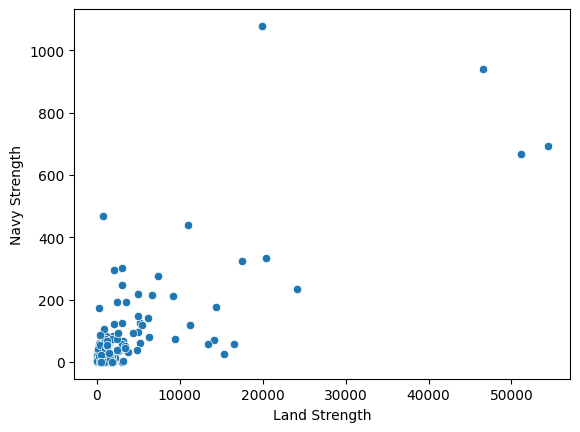

In [15]:
import seaborn as sns
sns.scatterplot(x=df['Land Strength'], y=df['Navy Strength']);

## Modelleme

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [17]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength value', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastli

In [18]:
cols=["Military Strength Power Index", "AirForce Strength", "Land Strength", "Navy Strength"] #"defense spending budget value",
     #"Airport Totals value", "Available Manpower value"]
x = df[cols]

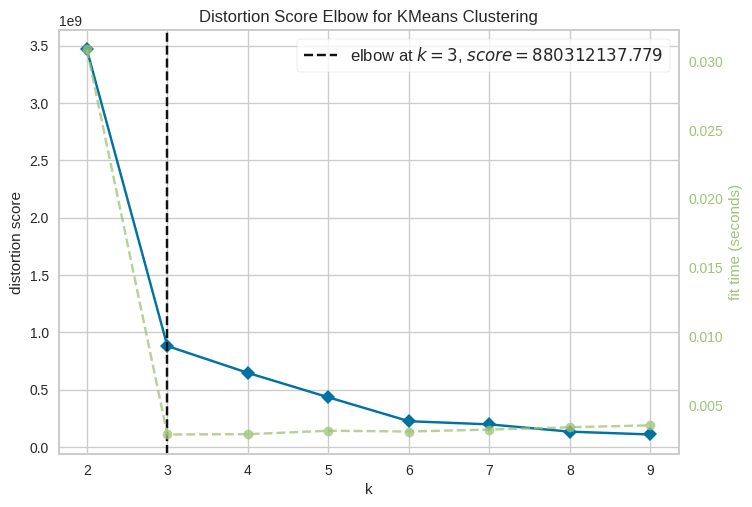

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(x) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [20]:
model=KMeans(3)
model=model.fit(x)
pred=model.predict(x)
x["Cluster"]=pred
silhouette_score(x, pred)

0.8240400253448312

In [21]:
x.head()

,Military Strength Power Index,AirForce Strength,Land Strength,Navy Strength,Cluster
0,1.3444,502,1288,0.0,1
1,2.3137,38,467,38.0,1
2,0.4659,1124,9117,212.0,0
3,0.8379,603,1474,57.0,1
4,0.6521,431,1390,55.0,1


In [22]:
import matplotlib.pyplot as plt

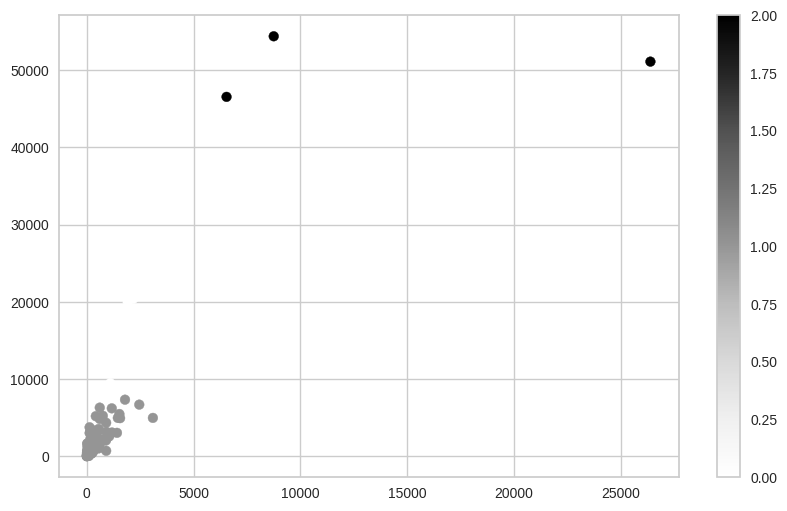

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x['AirForce Strength'], x['Land Strength'], c=pred)
plt.colorbar();

In [24]:
#pip install pycaret

In [25]:
from pycaret.clustering import *

In [26]:
setup(df)

,Description,Value
0,Session id,2247
1,Original data shape,"(138, 34)"
2,Transformed data shape,"(138, 171)"
3,Numeric features,33
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [27]:
kmeans=create_model("kmeans", 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8995,683.6690,0.2368,0,0,0


In [28]:
plot_model(kmeans)

## Sonuç

Bu projede ek olarak `pycaret` ile kümeleme yapıyoruz.